# Сегментация пользователей банка по количеству потребляемых продуктов

Анализ клиентов регионального банка и сегментация пользователей по количеству потребляемых продуктов.

## Материалы

Презентация

<https://disk.yandex.ee/i/QB8kEH4h91SqbQ>

Дашборд

<https://public.tableau.com/app/profile/elizaveta.taverova/viz/_16891657611450/Dashboard1?publish=yes>

## Загрузка данных

### Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

from plotly import graph_objects as go
from IPython.display import set_matplotlib_formats
from pandas.plotting import register_matplotlib_converters

### Открытие файла и изучение данных

In [3]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [4]:
df.head(15)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [6]:
df.describe().round()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.0,10000.0,9974.0,10000.0,7705.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,171815.0,849.0,43.0,3.0,827794.0,2.0,1.0,1.0,147867.0,0.0
std,33708.0,65.0,12.0,2.0,1980614.0,1.0,0.0,0.0,139389.0,0.0
min,94561.0,642.0,18.0,0.0,0.0,0.0,0.0,0.0,2546.0,0.0
25%,142810.0,802.0,33.0,0.0,295554.0,1.0,0.0,0.0,75252.0,0.0
50%,172728.0,853.0,40.0,3.0,524272.0,2.0,1.0,1.0,119658.0,0.0
75%,201262.0,900.0,51.0,4.0,980706.0,2.0,1.0,1.0,174501.0,0.0
max,229145.0,1000.0,86.0,9.0,119113552.0,5.0,1.0,1.0,1395064.0,1.0


### Вывод по пункту

Таким образом, мы импортировали библиотеки, загрузили данные, изучили данные таблицы и основную информацию.

## Предобработка данных

### Проверка корректности наименований колонок

In [7]:
df.columns

Index(['USERID', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'EST_SALARY', 'churn'],
      dtype='object')

Необходимо и зменить имя колонки USERID на user_id и EST_SALARY на est_salary.

In [8]:
df.columns = df.columns.str.lower()
df = df.rename(columns={'userid': 'user_id'})

In [9]:
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

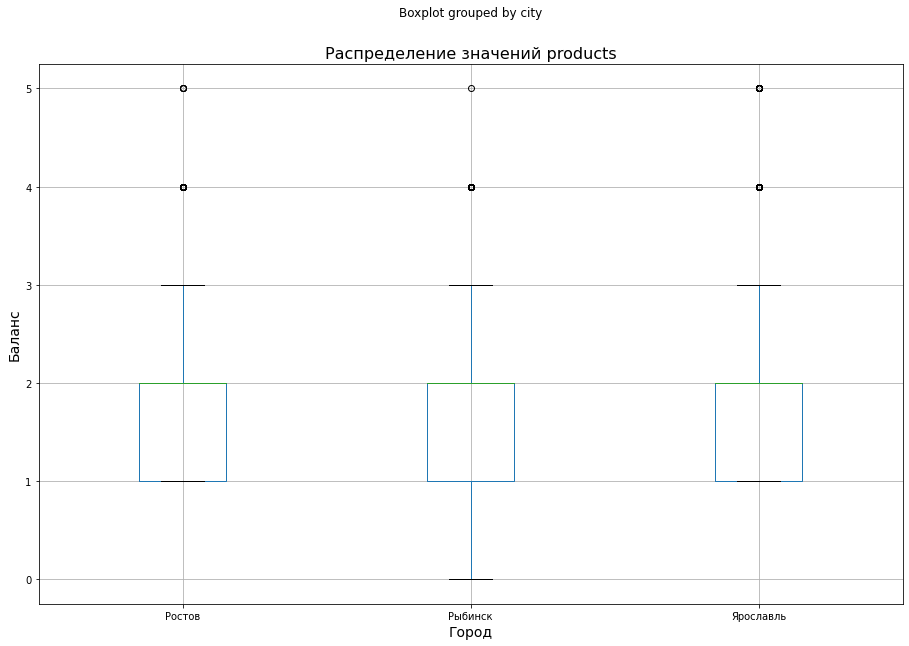

In [10]:
df.boxplot(column='products', by ='city',  figsize=(15, 10))
plt.title('Распределение значений products', fontsize=16)
plt.xlabel('Город', fontsize=14)
plt.ylabel('Баланс', fontsize=14)
plt.show()

Ноль продуктов наблюдается только в городе Рыбинск, посмотрим, какое количество пользователей с 0 продуктов в датасете.

In [11]:
df[df['products'] == 0]['user_id'].count()

1

Так как всего 1 клиент не имеет продуктов вообще, можзет удалить эту аномалию.

In [12]:
df= df[df['products'] != 0]

In [13]:
df[df['products'] == 0]['user_id'].count()

0

Таким образом, мы привели название колонок к корректному виду и убрали аномалию по продуктам.

### Проверка соотношения типов данных

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9999 non-null   int64  
 1   score          9999 non-null   float64
 2   city           9999 non-null   object 
 3   gender         9999 non-null   object 
 4   age            9973 non-null   float64
 5   equity         9999 non-null   int64  
 6   balance        7705 non-null   float64
 7   products       9999 non-null   int64  
 8   credit_card    9999 non-null   int64  
 9   last_activity  9999 non-null   int64  
 10  est_salary     9999 non-null   float64
 11  churn          9999 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1015.5+ KB


Все типы данных столбцов соответствуют содержимому. Менять типы данных не нужно.

### Исследование пропущенных значений

Посмотрим количество пропусков по столбцам.

In [15]:
df.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2294
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Посмотрим процент пропусков по столбцам.

In [16]:
df.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2294
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [17]:
df.isna().sum()*100/len(df)

user_id           0.000000
score             0.000000
city              0.000000
gender            0.000000
age               0.260026
equity            0.000000
balance          22.942294
products          0.000000
credit_card       0.000000
last_activity     0.000000
est_salary        0.000000
churn             0.000000
dtype: float64

Количество пропусков в столбце age незначительно, их можно удалить.

In [18]:
df = df.dropna(subset = ['age'])

Посмотрим, зависят ли от чего-то пропуски в balance.

In [20]:
print('Весь датасет',df['city'].unique())
print('С пропусками в балансе',df[df['balance'].isnull()]['city'].unique())

Весь датасет ['Рыбинск' 'Ярославль' 'Ростов']
С пропусками в балансе ['Рыбинск' 'Ярославль' 'Ростов']


Пропуски встречаютсмя в каждом из городов.

In [21]:
print('Весь датасет',df['products'].unique())
print('С пропусками в балансе',df[df['balance'].isnull()]['products'].unique())

Весь датасет [2 3 1 4 5]
С пропусками в балансе [1 2 3]


In [22]:
for i in df['products'].unique():
    print('По категории', i, 'процент пропуска:', df[(df['balance'].isnull()) & (df['products'] == i)]['user_id'].count()*100/df[df['products'] == i]['user_id'].count())
    

По категории 2 процент пропуска: 6.1535456143778084
По категории 3 процент пропуска: 2.7938342967244703
По категории 1 процент пропуска: 58.20042130604875
По категории 4 процент пропуска: 0.0
По категории 5 процент пропуска: 0.0


Наибольших процент пропусков по количеству продуктов по 1 продукту у клиента. Заполним пропуски медианным значением по группам.

In [23]:
df['balance'].fillna(df['balance'].mean(), inplace = True)

In [24]:
print('Весь датасет',df['products'].unique())
print('С пропусками в балансе',df[df['balance'].isnull()]['products'].unique())

Весь датасет [2 3 1 4 5]
С пропусками в балансе []


Посмотрим, есть ли выбросы в балансе.

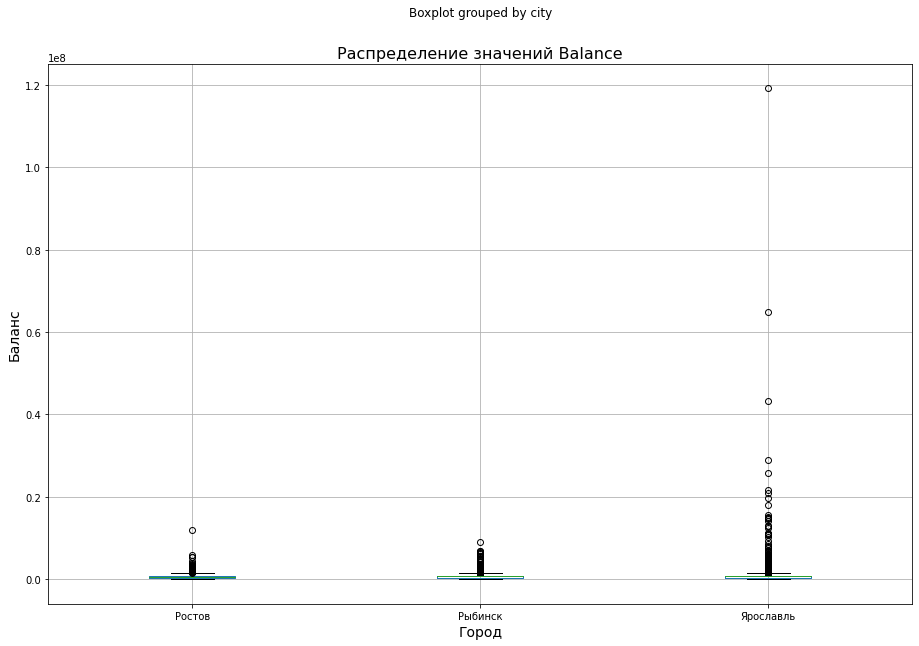

In [25]:
df.boxplot(column='balance', by ='city',  figsize=(15, 10))
plt.title('Распределение значений Balance', fontsize=16)
plt.xlabel('Город', fontsize=14)
plt.ylabel('Баланс', fontsize=14)
plt.show()

In [26]:
df.describe().round()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9973.0,9973.0,9973.0,9973.0,9973.0,9973.0,9973.0,9973.0,9973.0,9973.0
mean,171758.0,849.0,43.0,3.0,827246.0,2.0,1.0,1.0,147799.0,0.0
std,33696.0,65.0,12.0,2.0,1739490.0,1.0,0.0,0.0,139287.0,0.0
min,94561.0,642.0,18.0,0.0,0.0,1.0,0.0,0.0,2546.0,0.0
25%,142757.0,802.0,33.0,0.0,356952.0,1.0,0.0,0.0,75252.0,0.0
50%,172651.0,853.0,40.0,3.0,747894.0,2.0,1.0,1.0,119643.0,0.0
75%,201164.0,900.0,51.0,4.0,827246.0,2.0,1.0,1.0,174500.0,0.0
max,229145.0,1000.0,86.0,9.0,119113552.0,5.0,1.0,1.0,1395064.0,1.0


In [27]:
df['balance'].round().sort_values(ascending=False)

7597    119113552.0
1059     64866210.0
1846     43277100.0
4721     29008932.0
9753     25727762.0
           ...     
2876           20.0
3918            7.0
6164            6.0
3900            0.0
6757            0.0
Name: balance, Length: 9973, dtype: float64

In [28]:
balance_lim = 29008932

Удалим выбросы.

In [29]:
df_new = df[df['balance'] > balance_lim]
df = df.query('index not in @df_new.index')

### Исследование дубликатов

In [30]:
df.duplicated().sum()

0

Явных дубликатов нет. Проверим дубликаты по user_id.

In [31]:
df['user_id'].duplicated().sum()

50

In [32]:
len(df)

9970

In [33]:
print('Процент дубликатов по столбцу user_id: ',df['user_id'].duplicated().sum()*100/len(df))

Процент дубликатов по столбцу user_id:  0.5015045135406219


Достаточно небольшое количество дубликатов, поэтому их можно удалить.

In [34]:
df = df.drop_duplicates(subset=['user_id'])
df['user_id'].duplicated().sum()

0

### Кодировка городов и пола

In [35]:
df['gender'] = df['gender'].map({'М':1, 'Ж':0})
df['city'].map({'Ярославль':0, 'Рыбинск':1, 'Ростов':2})

df = pd.get_dummies(df)

### Вывод по пункту

Мы изменили имя колонки USERID на user_id и EST_SALARY на est_salary. Проверили соответствие пипов данных. Пропуски были обнаружены в столбцах age и balance. В age мы удалили пропуски, так как их было немного. Наибольших процент пропусков в balance по количеству продуктов по 1 продукту у клиента. Заполним пропуски медианным значением по группам. Явные дубликаты не были выявлены. Дубликаты были найлены в столбце user_id и удалены. Также была выполнена кодировка столбцов gender и city. В столбце продуктов выявили и удалили аномалию.

## Исследовательский анализ данных

### Средние значения показателей

In [36]:
df.describe().round()

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль
count,9920.0,9920.0,9920.0,9920.0,9920.0,9920.0,9920.0,9920.0,9920.0,9920.0,9920.0,9920.0,9920.0,9920.0
mean,171753.0,849.0,1.0,43.0,3.0,805329.0,2.0,1.0,1.0,147906.0,0.0,0.0,0.0,1.0
std,33693.0,65.0,1.0,12.0,2.0,1017433.0,1.0,0.0,0.0,139378.0,0.0,0.0,0.0,0.0
min,94561.0,642.0,0.0,18.0,0.0,0.0,1.0,0.0,0.0,2546.0,0.0,0.0,0.0,0.0
25%,142731.0,802.0,0.0,33.0,0.0,356685.0,1.0,0.0,0.0,75252.0,0.0,0.0,0.0,0.0
50%,172658.0,853.0,1.0,40.0,3.0,746770.0,2.0,1.0,1.0,119735.0,0.0,0.0,0.0,1.0
75%,201163.0,900.0,1.0,51.0,4.0,827246.0,2.0,1.0,1.0,174698.0,0.0,0.0,1.0,1.0
max,229145.0,1000.0,1.0,86.0,9.0,29008932.0,5.0,1.0,1.0,1395064.0,1.0,1.0,1.0,1.0


Посмотрим на средние значения столбцов по продуктам.

In [37]:
df.drop(['user_id'], axis=1).groupby('products').agg('mean').T.round(2)

products,1,2,3,4,5
score,854.34,844.58,837.16,878.27,859.26
gender,0.54,0.48,0.43,0.62,0.53
age,42.20,42.75,45.72,39.78,36.47
equity,1.33,3.15,3.53,4.15,3.68
balance,736754.50,778131.57,950947.09,1267820.57,610986.63
credit_card,0.86,0.63,0.35,0.68,1.00
last_activity,0.53,0.52,0.42,0.79,0.89
est_salary,180616.23,130541.67,128910.46,148788.95,116652.05
churn,0.07,0.19,0.29,0.63,0.42
city_Ростов,0.13,0.16,0.09,0.14,0.21


Посмотрим на стандартное отклонение столбцов по продуктам.

In [38]:
df.drop(['user_id'], axis=1).groupby('products').agg('std').T.round(2)

products,1,2,3,4,5
score,78.25,57.97,58.05,42.00,35.59
gender,0.50,0.50,0.50,0.49,0.51
age,11.98,12.16,13.31,9.62,9.22
equity,1.87,1.71,1.56,1.46,1.38
balance,614198.84,1138689.74,1184486.40,1324023.13,548125.46
credit_card,0.34,0.48,0.48,0.47,0.00
last_activity,0.50,0.50,0.49,0.41,0.32
est_salary,169348.45,117272.45,118813.23,129016.26,48404.53
churn,0.26,0.39,0.45,0.48,0.51
city_Ростов,0.34,0.36,0.29,0.35,0.42


Большее отклонение по продуктам во всех столбцах присутствует в группе с 1 продуктом. Также в столбце баланса большое отклонение в группе с 5 продуктами.

Посмотрим на средние значения столбцов по оттоку.

In [39]:
df.groupby('churn').agg('mean').T.round()

churn,0,1
user_id,171916.0,171024.0
score,845.0,863.0
gender,0.0,1.0
age,43.0,41.0
equity,2.0,4.0
balance,739846.0,1097354.0
products,2.0,2.0
credit_card,1.0,1.0
last_activity,0.0,1.0
est_salary,147798.0,148390.0


Посмотрим на стандартное отклонение столбцов по оттоку.

In [40]:
df.groupby('churn').agg('std').T.round()

churn,0,1
user_id,33327.0,35281.0
score,68.0,50.0
gender,0.0,0.0
age,12.0,11.0
equity,2.0,2.0
balance,907361.0,1369856.0
products,1.0,1.0
credit_card,0.0,0.0
last_activity,0.0,0.0
est_salary,142808.0,122958.0


В случае с отточными клиентами стандартное отклонение болье в столбце баланса, а в столбце с заработной платой больше у неотточных клиентов.

Большее отклонение по продуктам во всех столбцах присутствует в группе с 1 продуктом. Также в столбце баланса большое отклонение в группе с 5 продуктами.

В случае с отточными клиентами стандартное отклонение больше в столбце баланса, а в столбце с заработной платой больше у неотточных клиентов.

### Построение матрицы корреляции

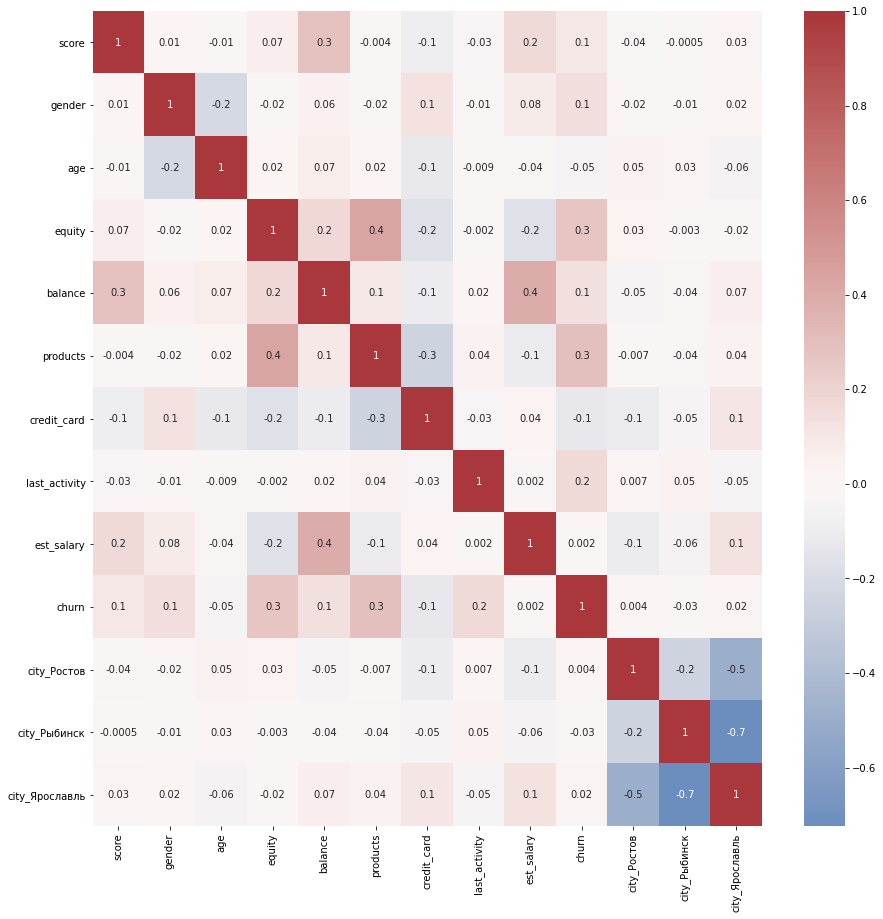

In [41]:
corr_m = df.drop(['user_id'], axis=1).corr()
corr_m

plt.figure(figsize = (15,15))
sns.heatmap(corr_m, center = 0, fmt='.1g', annot = True, cmap='vlag')

plt.show()

Слабая, но наибольшая  связь с целевой характеристикой churn наблюдается со столбцами equity и products. Также слабая связь наблюдается с last_activity, gender, score и balance.

### Влияние признаков на отток

Посмотрим средний отток.  

In [42]:
df['churn'].mean()

0.18316532258064516

Проверим влияние характеристик на отток

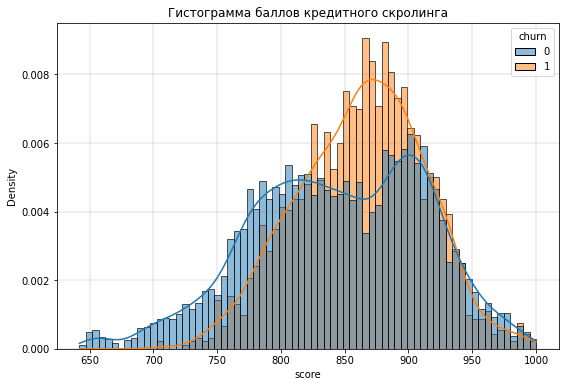

In [43]:
fig, ax = plt.subplots (figsize=(9, 6))

sns.histplot(data=df, x = 'score', hue = 'churn', bins = 71,
             kde = True, stat='density', common_norm = False,
             ax=ax)
ax.grid(c='grey', lw=0.25)
ax.set_title('Гистограмма баллов кредитного скролинга')
plt.show()

In [44]:
fiter_score_more= (df['score']<=920) & (df['score']>=850)
fiter_score_less= (df['score']<=820)

In [45]:
df.loc[fiter_score_less,'churn'].mean()

0.10900473933649289

In [46]:
df.loc[fiter_score_more,'churn'].mean()

0.24044002095337874

Средние оттоки разрезов отличаются от среднего. Показывают влияние на отток.

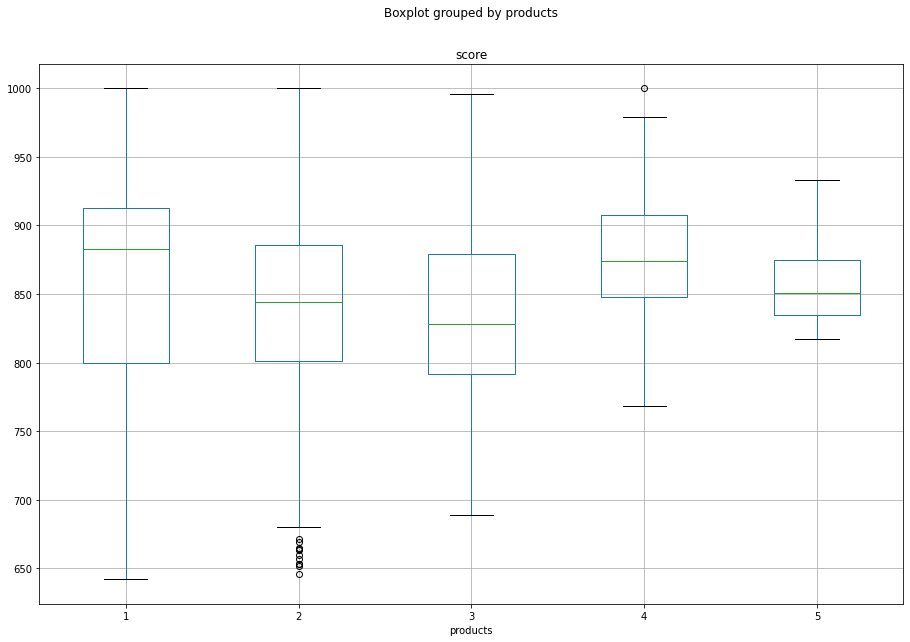

In [47]:
df.boxplot(column='score', by='products', figsize=(15, 10))
plt.show()

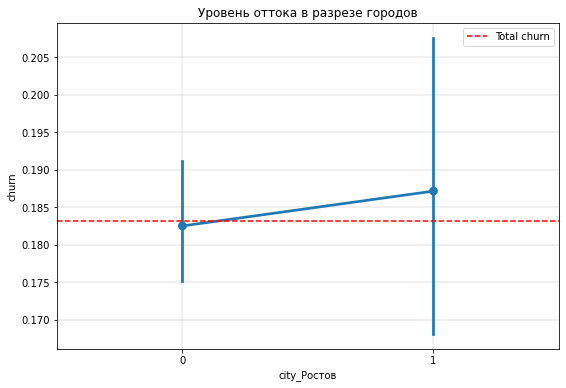

In [48]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.pointplot(data=df, x='city_Ростов', y='churn' , ax=ax)
ax.set_title("Уровень оттока в разрезе городов")
ax.grid(c='grey', lw=0.25)
ax.axhline(df['churn'].mean(),label= 'Total churn', ls='--', c='red')
ax.legend()
plt.show()

In [49]:
fiter_city_1_less = (df['city_Ростов']==0)
fiter_city_1_more = (df['city_Ростов']==1)
print(df.loc[fiter_city_1_less,'churn'].mean())
print(df.loc[fiter_city_1_more,'churn'].mean())

0.18250235183443086
0.18714689265536724


Средние оттоки разрезов показателей близки к среднему.

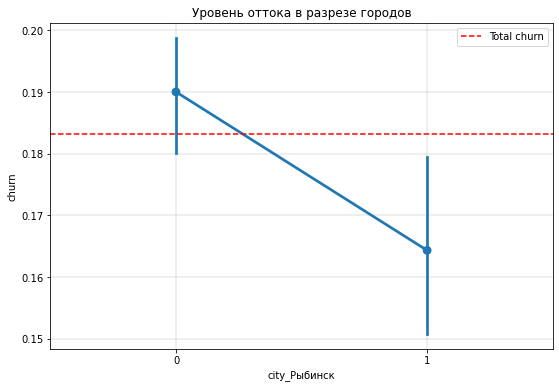

In [50]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.pointplot(data=df, x='city_Рыбинск', y='churn' , ax=ax)
ax.set_title("Уровень оттока в разрезе городов")
ax.grid(c='grey', lw=0.25)
ax.axhline(df['churn'].mean(),label= 'Total churn', ls='--', c='red')
ax.legend()
plt.show()

In [51]:
fiter_city_2_less = (df['city_Рыбинск']==1)
fiter_city_2_more = (df['city_Рыбинск']==0)
print(df.loc[fiter_city_2_less,'churn'].mean())
print(df.loc[fiter_city_2_more,'churn'].mean())

0.16434225405201658
0.19003715425897894


Средние оттоки разрезов показателей близки к среднему.

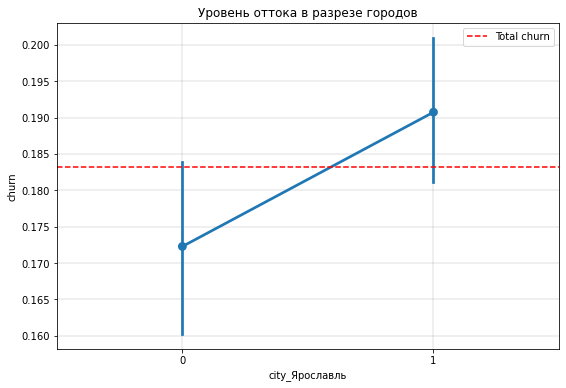

In [52]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.pointplot(data=df, x='city_Ярославль', y='churn' , ax=ax)
ax.set_title("Уровень оттока в разрезе городов")
ax.grid(c='grey', lw=0.25)
ax.axhline(df['churn'].mean(),label= 'Total churn', ls='--', c='red')
ax.legend()
plt.show()

In [53]:
fiter_city_3_less = (df['city_Ярославль']==0)
fiter_city_3_more = (df['city_Ярославль']==1)
print(df.loc[fiter_city_3_less,'churn'].mean())
print(df.loc[fiter_city_3_more,'churn'].mean())

0.17227820103219466
0.19073662621774057


Средние оттоки разрезов показателей близки к среднему.

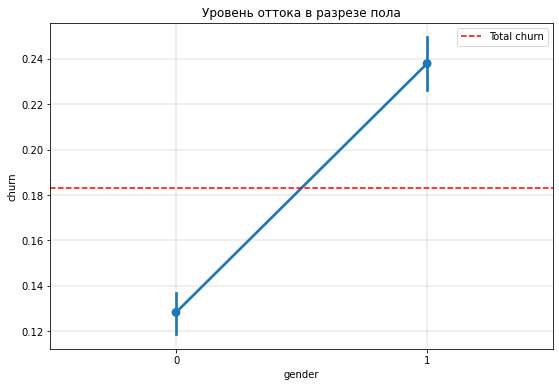

In [54]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.pointplot(data=df, x='gender', y='churn' , ax=ax)
ax.set_title("Уровень оттока в разрезе пола")
ax.grid(c='grey', lw=0.25)
ax.axhline(df['churn'].mean(),label= 'Total churn', ls='--', c='red')
ax.legend()
plt.show()

In [55]:
fiter_gender_less = (df['gender']==0)
fiter_gender_more = (df['gender']==1)

In [56]:
df.loc[fiter_gender_less,'churn'].mean()

0.12823101777059773

In [57]:
df.loc[fiter_gender_more,'churn'].mean()

0.23792270531400966

Средние оттоки разрезов отличаются от среднего. Показывают влияние на отток.

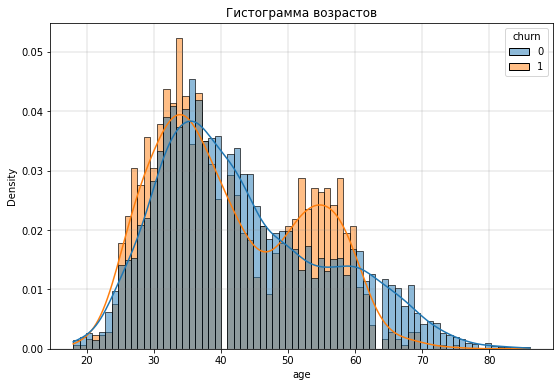

In [58]:
fig, ax = plt.subplots (figsize=(9, 6))

sns.histplot(data=df, x = 'age', hue = 'churn', bins = 71,
             kde = True, stat='density', common_norm = False,
             ax=ax)
ax.grid(c='grey', lw=0.25)
ax.set_title('Гистограмма возрастов')
plt.show()

In [59]:
fiter_age_more_1 = (df['age']<=40) & (df['age']>=25)
fiter_age_more_2 = (df['age']<=65) & (df['age']>=50)
fiter_age_less = (df['age']>=65)

In [60]:
df.loc[fiter_age_less,'churn'].mean()

0.03832752613240418

In [61]:
df.loc[fiter_age_more_1,'churn'].mean()

0.19822240595287308

In [62]:
df.loc[fiter_age_more_2,'churn'].mean()

0.22444541104828186

Средние оттоки разрезов отличаются от среднего. Показывают влияние на отток.

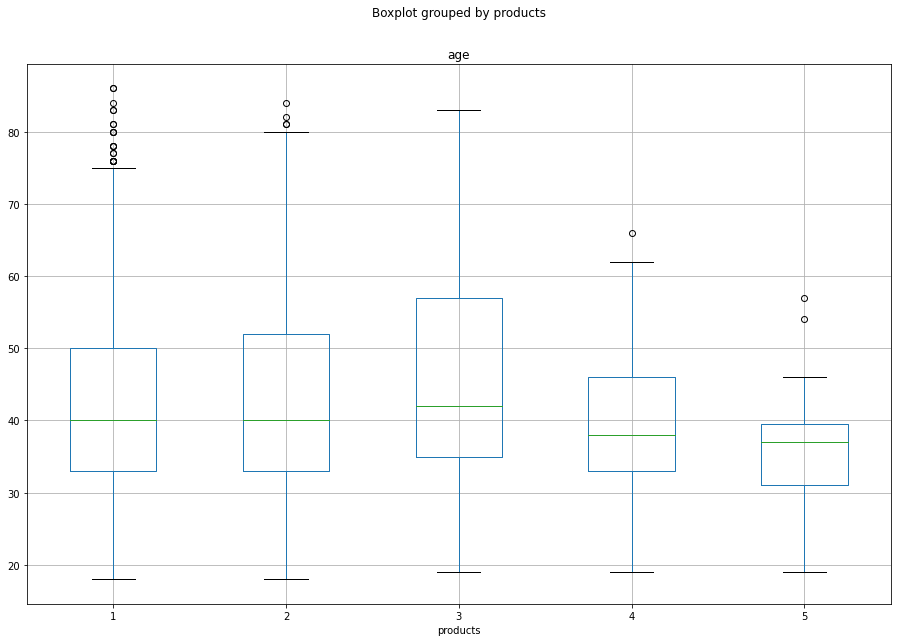

In [63]:
df.boxplot(column='age', by='products', figsize=(15, 10))
plt.show()

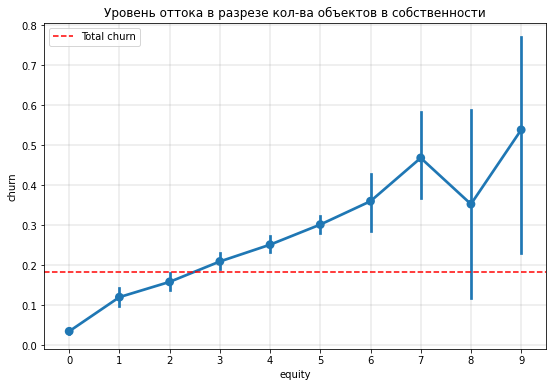

In [64]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.pointplot(data=df, x='equity', y='churn' , ax=ax)
ax.set_title("Уровень оттока в разрезе кол-ва объектов в собственности")
ax.grid(c='grey', lw=0.25)
ax.axhline(df['churn'].mean(),label= 'Total churn', ls='--', c='red')
ax.legend()
plt.show()

In [65]:
fiter_equity_less = (df['equity']< 3)
fiter_equity_more = (df['equity']<=5) & (df['equity']>=3)
fiter_equity_super_more = (df['equity']> 5)

Выделим здесь также суперотточных клиентов.

In [66]:
df.loc[fiter_equity_less,'churn'].mean()

0.07984442919240449

Отток сильно ниже среднего показателя.

In [67]:
df.loc[fiter_equity_more,'churn'].mean()

0.2576245501041864

In [68]:
df.loc[fiter_equity_super_more,'churn'].mean()

0.4

Оттоки достаточно высокие, превышают средний показатель.

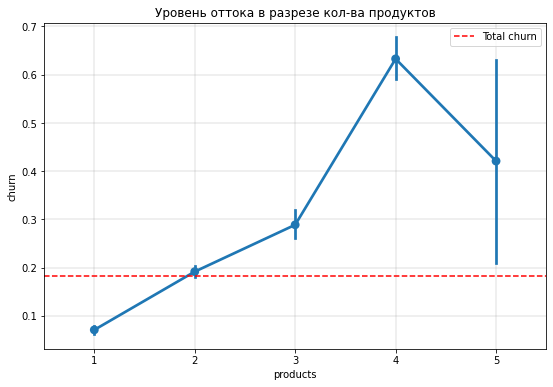

In [69]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.pointplot(data=df, x='products', y='churn' , ax=ax)
ax.set_title("Уровень оттока в разрезе кол-ва продуктов")
ax.grid(c='grey', lw=0.25)
ax.axhline(df['churn'].mean(),label= 'Total churn', ls='--', c='red')
ax.legend()
plt.show()

In [70]:
fiter_products_less= (df['products']<3)
fiter_products_more= (df['products']>=3)

In [71]:
df.loc[fiter_products_less,'churn'].mean()

0.1443028932015716

Отток близок к среднему показателю.

In [72]:
df.loc[fiter_products_more,'churn'].mean()

0.3977646285338593

Отток достаточно высокий, превышает средний показатель.

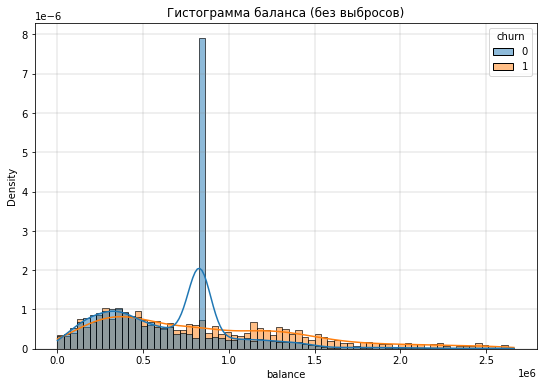

In [73]:
fig, ax = plt.subplots (figsize=(9, 6))

upper_bound = np.nanpercentile(df['balance'], 97.5)
#создаем фильтр
filter_balance_outliers = (df['balance'] <= upper_bound)
sns.histplot(data=df.loc[filter_balance_outliers], x = 'balance', hue = 'churn', bins = 71,
             kde = True, stat='density', common_norm = False,
             ax=ax)
ax.grid(c='grey', lw=0.25)
ax.set_title('Гистограмма баланса (без выбросов)')
plt.show()

Применим фильтр к балансу и посмотрим отток с учетом ограничений.

In [74]:
fiter_balanse_less= (df['balance']<=1000000) & (df['balance']>=500000)
fiter_balanse_more= (df['balance']<=1350000) & (df['balance']>=1250000)

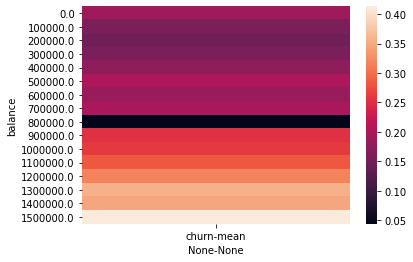

In [75]:
sns.heatmap(df.assign(balance = df.balance.round(-5)).groupby('balance').agg({"churn":['mean']}).head(16));

In [76]:
df.loc[fiter_balanse_less,'churn'].mean()

0.10956402647797306

Отток выше среднего.

In [77]:
df.loc[fiter_balanse_more,'churn'].mean()

0.3574660633484163

Отток достаточно высокий, превышает средний показатель.

In [78]:
df['is_high_balance'] = fiter_balanse_more

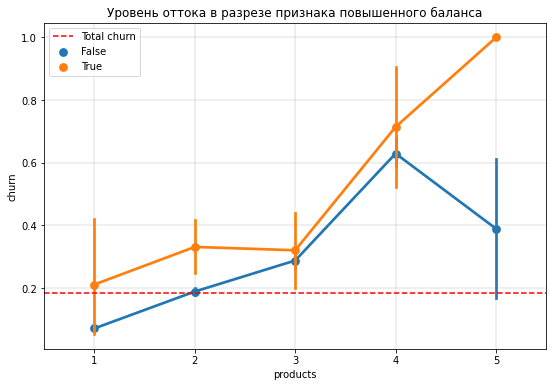

In [79]:
fig, ax = plt.subplots(figsize=(9, 6))
#визуализируем фильтрованные данные
sns.pointplot(data=df, x='products', y='churn' , hue= 'is_high_balance', ax=ax)
ax.set_title("Уровень оттока в разрезе признака повышенного баланса")
ax.grid(c='grey', lw=0.25)
ax.axhline(df['churn'].mean(),label= 'Total churn', ls='--', c='red')
ax.legend()
plt.show()

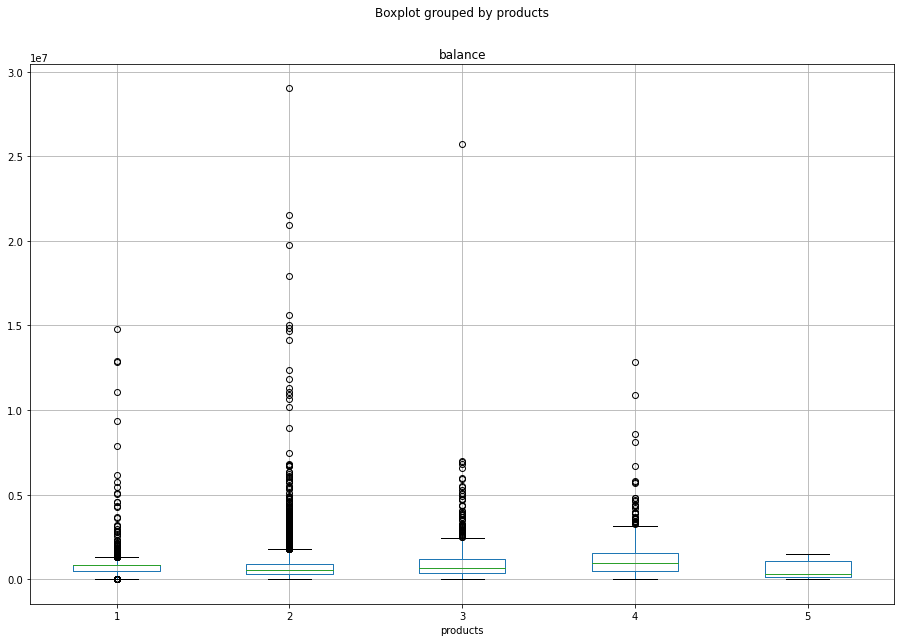

In [80]:
df.boxplot(column='balance', by='products', figsize=(15, 10))
plt.show()

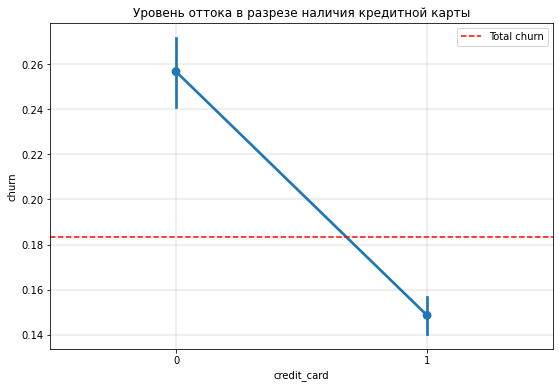

In [81]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.pointplot(data=df, x='credit_card', y='churn' , ax=ax)
ax.set_title("Уровень оттока в разрезе наличия кредитной карты")
ax.grid(c='grey', lw=0.25)
ax.axhline(df['churn'].mean(),label= 'Total churn', ls='--', c='red')
ax.legend()
plt.show()

In [82]:
fiter_credit_card_less = (df['credit_card']==1)
fiter_credit_card_more = (df['credit_card']==0)

In [83]:
df.loc[fiter_credit_card_less,'churn'].mean()

0.14853246368218204

In [84]:
df.loc[fiter_credit_card_more,'churn'].mean()

0.25677378701953374

Отток отличается от среднего.

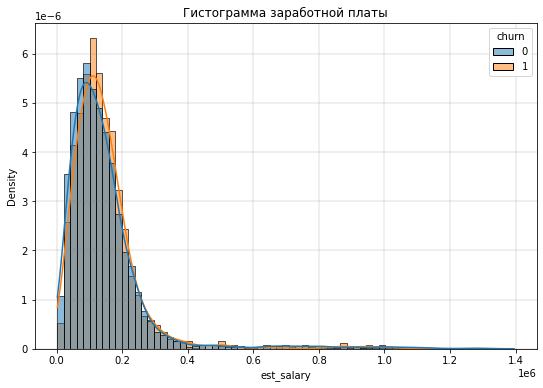

In [85]:
fig, ax = plt.subplots (figsize=(9, 6))

sns.histplot(data=df, x = 'est_salary', hue = 'churn', bins = 71,
             kde = True, stat='density', common_norm = False,
             ax=ax)
ax.grid(c='grey', lw=0.25)
ax.set_title('Гистограмма заработной платы')
plt.show()

In [86]:
fiter_est_salary_more = (df['est_salary']>=100000) & (df['est_salary']<=200000)
fiter_est_salary_less = (df['est_salary']<=300000)

In [87]:
df.loc[fiter_est_salary_less,'churn'].mean()

0.18399401645474944

In [88]:
df.loc[fiter_est_salary_more,'churn'].mean()

0.20472072914232298

Отток близок к среднему.

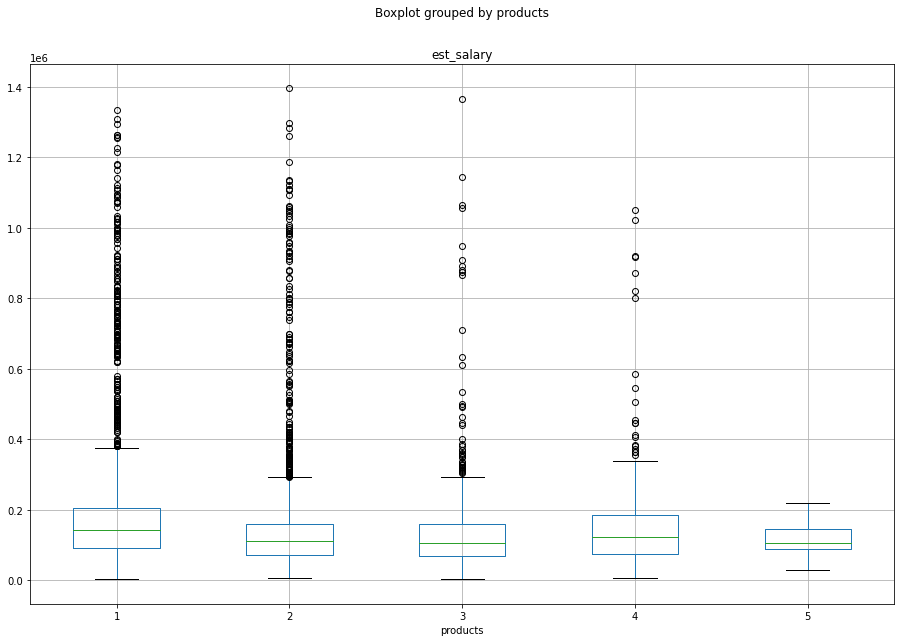

In [89]:
df.boxplot(column='est_salary', by='products', figsize=(15, 10))
plt.show()

### Вывод по пункту

Большее отклонение по продуктам во всех столбцах присутствует в группе с 1 продуктом. Также в столбце баланса большое отклонение в группе с 5 продуктами.

В случае с отточными клиентами стандартное отклонение больше в столбце баланса, а в столбце с заработной платой больше у неотточных клиентов.

Слабая, но наибольшая связь с целевой характеристикой churn наблюдается со столбцами equity и products. Также слабая связь наблюдается с last_activity, gender, score и balance. Мы выяснили, что на отток больше всего влияют такие показатели, как score, gender, age, credit_card, equity и products.

## Сегментация пользователей

### Распределение пользователей по количеству продуктов, гистограмма

Разобьем датасет на группы по количеству продуктов.

In [90]:
df[df['products'] == 1]['user_id'].count()

3306

In [91]:
df[df['products'] == 2]['user_id'].count()

5093

In [92]:
df[df['products'] == 3]['user_id'].count()

1028

In [93]:
df[df['products'] == 4]['user_id'].count()

474

In [94]:
df[df['products'] == 5]['user_id'].count()

19

In [95]:
p1 = df[df['products'] == 1]
p2 = df[df['products'] == 2]
p3 = df[df['products'] == 3]
p4 = df[df['products'] == 4]
p5 = df[df['products'] == 5]

In [96]:
p1.describe().round()

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль
count,3306.0,3306.0,3306.0,3306.0,3306.0,3306.0,3306.0,3306.0,3306.0,3306.0,3306.0,3306.0,3306.0,3306.0
mean,172049.0,854.0,1.0,42.0,1.0,736754.0,1.0,1.0,1.0,180616.0,0.0,0.0,0.0,1.0
std,33299.0,78.0,0.0,12.0,2.0,614199.0,0.0,0.0,0.0,169348.0,0.0,0.0,0.0,0.0
min,94590.0,642.0,0.0,18.0,0.0,6.0,1.0,0.0,0.0,2546.0,0.0,0.0,0.0,0.0
25%,143399.0,800.0,0.0,33.0,0.0,503942.0,1.0,1.0,0.0,90476.0,0.0,0.0,0.0,0.0
50%,173016.0,883.0,1.0,40.0,0.0,827246.0,1.0,1.0,1.0,142183.0,0.0,0.0,0.0,1.0
75%,201177.0,913.0,1.0,50.0,3.0,827246.0,1.0,1.0,1.0,204818.0,0.0,0.0,1.0,1.0
max,229145.0,1000.0,1.0,86.0,9.0,14802130.0,1.0,1.0,1.0,1333687.0,1.0,1.0,1.0,1.0


Группы с 1 и 2 продуктами слишком большие. Маркетинг не сможет у нас обработать сегменты более 2 тысяч человек.Поэтому необходимо разбить их на более мелкие, сделаем это на основании возраста. В свою очередь группы с 3, 4 и 5 продуктами достаточно малы и их можно объединить в один сегмент (сегменты менее 300 человек нам неинтересны). Более того, группы с этими продуктами имеют больший отток в отличае от клиентов с 1 и 2 продуктами.

In [97]:
s1=p1[p1['age']>=40]
s1['user_id'].count()

1688

In [98]:
s2=p1[p1['age']<40]
s2['user_id'].count()

1618

In [99]:
p2.describe().round()

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль
count,5093.0,5093.0,5093.0,5093.0,5093.0,5093.0,5093.0,5093.0,5093.0,5093.0,5093.0,5093.0,5093.0,5093.0
mean,171431.0,845.0,0.0,43.0,3.0,778132.0,2.0,1.0,1.0,130542.0,0.0,0.0,0.0,1.0
std,33762.0,58.0,0.0,12.0,2.0,1138690.0,0.0,0.0,0.0,117272.0,0.0,0.0,0.0,0.0
min,94561.0,646.0,0.0,18.0,0.0,0.0,2.0,0.0,0.0,5342.0,0.0,0.0,0.0,0.0
25%,141712.0,801.0,0.0,33.0,2.0,307619.0,2.0,0.0,0.0,69998.0,0.0,0.0,0.0,0.0
50%,172138.0,844.0,0.0,40.0,3.0,556010.0,2.0,1.0,1.0,109692.0,0.0,0.0,0.0,1.0
75%,201039.0,886.0,1.0,52.0,5.0,902848.0,2.0,1.0,1.0,159251.0,0.0,0.0,1.0,1.0
max,229136.0,1000.0,1.0,84.0,9.0,29008932.0,2.0,1.0,1.0,1395064.0,1.0,1.0,1.0,1.0


In [100]:
s3=p2[p2['age']>=40]
s3['user_id'].count()

2666

In [101]:
s4=p2[p2['age']<40]
s4['user_id'].count()

2427

In [102]:
p3.describe().round()

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль
count,1028.0,1028.0,1028.0,1028.0,1028.0,1028.0,1028.0,1028.0,1028.0,1028.0,1028.0,1028.0,1028.0,1028.0
mean,172965.0,837.0,0.0,46.0,4.0,950947.0,3.0,0.0,0.0,128910.0,0.0,0.0,0.0,1.0
std,33446.0,58.0,0.0,13.0,2.0,1184486.0,0.0,0.0,0.0,118813.0,0.0,0.0,0.0,0.0
min,99721.0,689.0,0.0,19.0,0.0,63.0,3.0,0.0,0.0,3487.0,0.0,0.0,0.0,0.0
25%,144653.0,792.0,0.0,35.0,3.0,374285.0,3.0,0.0,0.0,67347.0,0.0,0.0,0.0,1.0
50%,175333.0,828.0,0.0,42.0,4.0,689476.0,3.0,0.0,0.0,105969.0,0.0,0.0,0.0,1.0
75%,201400.0,879.0,1.0,57.0,5.0,1208008.0,3.0,1.0,1.0,158291.0,1.0,0.0,0.0,1.0
max,229058.0,996.0,1.0,83.0,9.0,25727762.0,3.0,1.0,1.0,1363550.0,1.0,1.0,1.0,1.0


In [103]:
s5 = pd.concat([p3, p4, p5])
s5['user_id'].count()

1521

Мы разбили клиентов на 5 сегментов по продуктам и возрасту.

### Исследование отличительных черт получившихся групп

In [104]:
def inf_s(s):
    print('Размер сегмента: ',len(s),'\n')
    print('Показатели по оттоку: \n',s.agg({"churn":["mean","sum","count"]}), '\n')
    print('Средние значения всех показателей: \n',s.mean().round(), '\n')
    print('Какие продукты в сегменте: \n', s['products'].unique())

In [105]:
inf_s(s1)

Размер сегмента:  1688 

Показатели по оттоку: 
              churn
mean      0.066943
sum     113.000000
count  1688.000000 

Средние значения всех показателей: 
 user_id            172726.0
score                 853.0
gender                  0.0
age                    51.0
equity                  1.0
balance            753974.0
products                1.0
credit_card             1.0
last_activity           1.0
est_salary         187380.0
churn                   0.0
city_Ростов             0.0
city_Рыбинск            0.0
city_Ярославль          1.0
is_high_balance         0.0
dtype: float64 

Какие продукты в сегменте: 
 [1]


In [106]:
inf_s(s2)

Размер сегмента:  1618 

Показатели по оттоку: 
              churn
mean      0.075402
sum     122.000000
count  1618.000000 

Средние значения всех показателей: 
 user_id            171342.0
score                 855.0
gender                  1.0
age                    33.0
equity                  1.0
balance            718790.0
products                1.0
credit_card             1.0
last_activity           1.0
est_salary         173560.0
churn                   0.0
city_Ростов             0.0
city_Рыбинск            0.0
city_Ярославль          1.0
is_high_balance         0.0
dtype: float64 

Какие продукты в сегменте: 
 [1]


In [107]:
inf_s(s3)

Размер сегмента:  2666 

Показатели по оттоку: 
              churn
mean      0.169542
sum     452.000000
count  2666.000000 

Средние значения всех показателей: 
 user_id            171822.0
score                 843.0
gender                  0.0
age                    52.0
equity                  3.0
balance            825765.0
products                2.0
credit_card             1.0
last_activity           1.0
est_salary         133468.0
churn                   0.0
city_Ростов             0.0
city_Рыбинск            0.0
city_Ярославль          1.0
is_high_balance         0.0
dtype: float64 

Какие продукты в сегменте: 
 [2]


In [108]:
inf_s(s4)

Размер сегмента:  2427 

Показатели по оттоку: 
              churn
mean      0.216316
sum     525.000000
count  2427.000000 

Средние значения всех показателей: 
 user_id            171001.0
score                 847.0
gender                  1.0
age                    32.0
equity                  3.0
balance            725807.0
products                2.0
credit_card             1.0
last_activity           1.0
est_salary         127327.0
churn                   0.0
city_Ростов             0.0
city_Рыбинск            0.0
city_Ярославль          1.0
is_high_balance         0.0
dtype: float64 

Какие продукты в сегменте: 
 [2]


In [109]:
inf_s(s5)

Размер сегмента:  1521 

Показатели по оттоку: 
              churn
mean      0.397765
sum     605.000000
count  1521.000000 

Средние значения всех показателей: 
 user_id             172188.0
score                  850.0
gender                   0.0
age                     44.0
equity                   4.0
balance            1045450.0
products                 3.0
credit_card              0.0
last_activity            1.0
est_salary          134952.0
churn                    0.0
city_Ростов              0.0
city_Рыбинск             0.0
city_Ярославль           1.0
is_high_balance          0.0
dtype: float64 

Какие продукты в сегменте: 
 [3 4 5]


Изучив сегменты, мы выяснили, что наибольший отток имеет 5 сегмент. 1 и 2 сегменты имеют очень низкую отточность, а 3 и 4 близкую к средней.

### Вывод по пункту

Группы с 1 и 2 продуктами слишком большие. Маркетинг не сможет у нас обработать сегменты более 2 тысяч человек.Поэтому необходимо разбить их на более мелкие, сделаем это на основании возраста. В свою очередь группы с 3, 4 и 5 продуктами достаточно малы и их можно объединить в один сегмент (сегменты менее 300 человек нам неинтересны). Более того, группы с этими продуктами имеют больший отток в отличае от клиентов с 1 и 2 продуктами. Мы разбили клиентов на 5 сегментов по продуктам и возрасту. Изучив сегменты, мы выяснили, что наибольший отток имеет 5 сегмент.

Стоит обратить большее внимание на 5 сегмент, в который входят клиенnы с 3,4,5 продуктами. Тут наблюдается больший отток, стоит проанализировать, почему клиенты с таким количеством продуктов склонны уходить. Клиенты 1 и 2 второго сегмента (имеющие 1 продукт) больше всего склонны оставаться, таким клиентам стоит больше предлагать другие продукты банка. Более того, таких клиентов очень много. Также большое количество клиентов с 2 продуктами (3,4 сегмент). У 3 сегмента отток ниже среднего, а у 4 немного выше. Этим пользователям также стоит предлагать другие продукты банка. Пользователи с 2 продуктам, которые моложе (4 сегмент, средний возраст 32 года) более склонны к оттоку, на них также стоит обратить внимание и проанализировать, с чем связан отток.

## Проверка гипотез

*Пороговое значение alpha определим 0.05.*

In [110]:
alpha = 0.05

### Гипотеза различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

Сформируем гипотезу.

H0: Возраст клиентов с 1 продактами и 2 одинаковы.

H1: Возраст клиентов с 1 продактами и 2 различны.

*Мы сформировали гипотизу H0. Исходя из H0 формулируется альтернативная гипотеза H1. Это утверждение, которое принимается верным, если отбрасывается H0. Такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны.*

In [111]:
first = df.query('products == 1')['age']
second = df.query('products == 2')['age']

results = stats.ttest_ind(first, second)# проведите тест и посчитайте p-значение

# выведите на экран полученное p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha:# сравните p-значение с заданным уровнем значимости alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.04372508723637701
Отвергаем нулевую гипотезу


Проведем также проверку при помощи u-критерия Манна-Уитни.

In [112]:
res = stats.mannwhitneyu (first, second, alternative='two-sided')
print('p-значение:', res.pvalue)

if res.pvalue < alpha:# сравните p-значение с заданным уровнем значимости alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.07581001163630846
Не получилось отвергнуть нулевую гипотезу


По результатам обеих проверок мы отвергаем нулевую гипотезу. Можем сделать вывод, что возраст клиентов с 1 продактами и 2 различны.

### Гипотеза различия баллов кредитного скоринга между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются тремя.

Сформируем гипотезу.

H0: Баллы кредитного скролинга клиентов с 2 продактами и 3 одинаковы.

H1: Баллы кредитного скролинга клиентов с 2 продактами и 3 различны.

*Мы сформировали гипотизу H0. Исходя из H0 формулируется альтернативная гипотеза H1. Это утверждение, которое принимается верным, если отбрасывается H0. Такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны.*

In [113]:
first = df.query('products == 2')['score']
second = df.query('products == 3')['score']

results = stats.ttest_ind(first, second)# проведите тест и посчитайте p-значение

# выведите на экран полученное p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha:# сравните p-значение с заданным уровнем значимости alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.00018254052043073244
Отвергаем нулевую гипотезу


Можем сделать вывод, что баллы кредитного скролинга клиентов с 1 продактами и 2 различны.

### Вывод по пункту

Можем сделать вывод, что возраст клиентов с 1 продактами и 2 различны и баллы кредитного скролинга клиентов с 1 продактами и 2 различны.

## Общий вывод

Мы изменили имя колонки USERID на user_id и EST_SALARY на est_salary. Проверили соответствие пипов данных. Пропуски были обнаружены в столбцах age и balance. В age мы удалили пропуски, так как их было немного. Наибольших процент пропусков в balance по количеству продуктов по 1 продукту у клиента. Заполним пропуски медианным значением по группам. Явные дубликаты не были выявлены. Дубликаты были найлены в столбце user_id и удалены. Также была выполнена кодировка столбцов gender и city. В столбце продуктов выявили и удалили аномалию.

Большее отклонение по продуктам во всех столбцах присутствует в группе с 1 продуктом. Также в столбце баланса большое отклонение в группе с 5 продуктами.

В случае с отточными клиентами стандартное отклонение больше в столбце баланса, а в столбце с заработной платой больше у неотточных клиентов.

Слабая, но наибольшая связь с целевой характеристикой churn наблюдается со столбцами equity и products. Также слабая связь наблюдается с last_activity, gender, score и balance. Мы выяснили, что на отток больше всего влияют такие показатели, как количество объектов в собственности, количество продуктов и баланс.

Группы с 1 и 2 продуктами слишком большие. Маркетинг не сможет у нас обработать сегменты более 2 тысяч человек.Поэтому необходимо разбить их на более мелкие, сделаем это на основании возраста. В свою очередь группы с 3, 4 и 5 продуктами достаточно малы и их можно объединить в один сегмент (сегменты менее 300 человек нам неинтересны). Более того, группы с этими продуктами имеют больший отток в отличае от клиентов с 1 и 2 продуктами. Мы разбили клиентов на 5 сегментов по продуктам и возрасту. Изучив сегменты, мы выяснили, что наибольший отток имеет 5 сегмент.

Стоит обратить большее внимание на 5 сегмент, в который входят клиенnы с 3,4,5 продуктами. Тут наблюдается больший отток, стоит проанализировать, почему клиенты с таким количеством продуктов склонны уходить. Клиенты 1 и 2 второго сегмента (имеющие 1 продукт) больше всего склонны оставаться, таким клиентам стоит больше предлагать другие продукты банка. Более того, таких клиентов очень много. Также большое количество клиентов с 2 продуктами (3,4 сегмент). У 3 сегмента отток ниже среднего, а у 4 немного выше. Этим пользователям также стоит предлагать другие продукты банка. Пользователи с 2 продуктам, которые моложе (4 сегмент, средний возраст 32 года) более склонны к оттоку, на них также стоит обратить внимание и проанализировать, с чем связан отток.

Проведя гипотизы, можем сделать вывод, что возраст клиентов с 1 продактами и 2 различны и баллы кредитного скролинга клиентов с 1 продактами и 2 различны.